In [45]:
import os
os.environ['GDAL_DATA'] = "C:\\Users\\Roger\\Anaconda3\\pkgs\\libgdal-2.3.3-h10f50ba_0\\Library\\share\\gdal"
import pandas as pd
import geopandas
from osgeo import osr

In [46]:
df = pd.read_csv("UTSEUS-MOBIKE-shanghai_full.csv")

First when you have geographic data, you plot them to check if location looks correct.
If not you clean them by using bounding box with the right position of the data you want keep

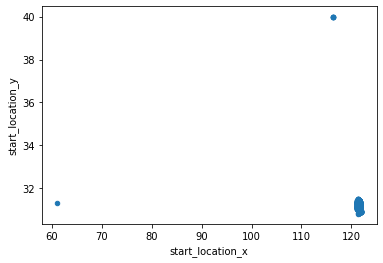

In [47]:
%matplotlib inline
df.plot.scatter(x='start_location_x', y='start_location_y')

In [48]:
df.head()

,orderid,bikeid,userid,start_time,start_location_x,start_location_y,end_time,end_location_x,end_location_y,track
0,1,324731,7541,2016-08-28 00:00,121.490,31.280,2016-08-28 00:08,121.486,31.273,"121.485,31.275#121.485,31.276#121.486,31.273#1..."
1,6,288841,4427,2016-08-28 00:00,121.462,31.313,2016-08-28 00:17,121.455,31.315,"121.455,31.313#121.455,31.314#121.455,31.315#1..."
2,8,315873,6474,2016-08-28 00:00,121.416,31.154,2016-08-28 00:14,121.419,31.156,"121.416,31.154#121.416,31.155#121.417,31.155#1..."
3,10,93155,12616,2016-08-28 00:00,121.436,31.320,2016-08-28 00:12,121.444,31.310,"121.436,31.318#121.436,31.319#121.436,31.320#1..."
4,11,352484,11596,2016-08-28 00:00,121.459,31.325,2016-08-28 00:08,121.460,31.315,"121.459,31.315#121.459,31.316#121.459,31.317#1..."


We want to keep only the position in Shanghai.
We can by the way notice that we have 2 area of data far from the others. We definitely don't want these area.

In [49]:
df = df[(df['start_location_x'] >= 121.10157) & (df['start_location_x'] <= 121.80461) & (df['start_location_y'] >= 30.975) & (df['start_location_y'] <= 31.51499)]

In [50]:
df = df[(df['end_location_x'] >= 121.10157) & (df['end_location_x'] <= 121.80461) & (df['end_location_y'] >= 30.975) & (df['end_location_y'] <= 31.51499)]

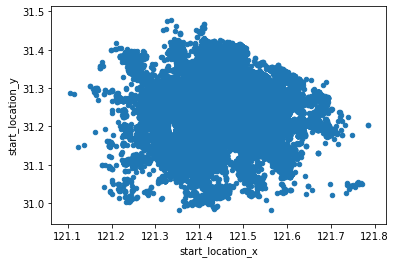

In [51]:
df.plot.scatter(x='start_location_x', y='start_location_y')

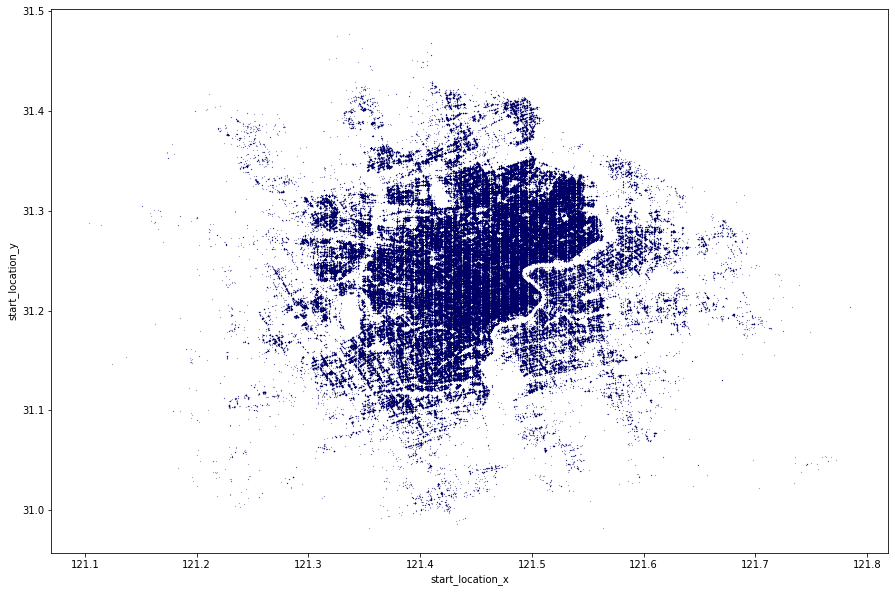

In [52]:
df.plot.scatter(x='start_location_x', y='start_location_y', s=0.02, c='#000066', figsize=(15,10))

In [53]:
df.head()

,orderid,bikeid,userid,start_time,start_location_x,start_location_y,end_time,end_location_x,end_location_y,track
0,1,324731,7541,2016-08-28 00:00,121.490,31.280,2016-08-28 00:08,121.486,31.273,"121.485,31.275#121.485,31.276#121.486,31.273#1..."
1,6,288841,4427,2016-08-28 00:00,121.462,31.313,2016-08-28 00:17,121.455,31.315,"121.455,31.313#121.455,31.314#121.455,31.315#1..."
2,8,315873,6474,2016-08-28 00:00,121.416,31.154,2016-08-28 00:14,121.419,31.156,"121.416,31.154#121.416,31.155#121.417,31.155#1..."
3,10,93155,12616,2016-08-28 00:00,121.436,31.320,2016-08-28 00:12,121.444,31.310,"121.436,31.318#121.436,31.319#121.436,31.320#1..."
4,11,352484,11596,2016-08-28 00:00,121.459,31.325,2016-08-28 00:08,121.460,31.315,"121.459,31.315#121.459,31.316#121.459,31.317#1..."


Projection : mercator

In [54]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [55]:
df['duration'] = df['end_time'] - df['start_time']

In [56]:
df['duration'].head()

0   00:08:00
1   00:17:00
2   00:14:00
3   00:12:00
4   00:08:00
Name: duration, dtype: timedelta64[ns]

In [57]:
from osgeo import osr, ogr

old_crs = osr.SpatialReference()
old_crs.ImportFromEPSG(4326)
new_crs = osr.SpatialReference()
new_crs.ImportFromEPSG(4479)
transform = osr.CoordinateTransformation(old_crs, new_crs)

def getNewLongitude(xy):
    #return transform.TransformPoint([xy[0], xy[1], 0.0])[0]
    point = ogr.Geometry(ogr.wkbPoint)
    point.AddPoint(xy[0], xy[1])
    point.Transform(transform)
    return point.GetX()

def getNewLatitude(xy):
    #return transform.TransformPoint([xy[0], xy[1], 0.0])[1]
    point = ogr.Geometry(ogr.wkbPoint)
    point.AddPoint(xy[0], xy[1])
    point.Transform(transform)
    return point.GetY()

df['start_longitude'] = df[['start_location_x', 'start_location_y']].apply(getNewLongitude, axis=1)
df['start_latitude'] = df[['start_location_x', 'start_location_y']].apply(getNewLatitude, axis=1)
df['end_longitude'] = df[['end_location_x', 'end_location_y']].apply(getNewLongitude, axis=1)
df['end_latitude'] = df[['end_location_x', 'end_location_y']].apply(getNewLatitude, axis=1)

scipy euclidienne distance

In [58]:
df.head()

,orderid,bikeid,userid,start_time,start_location_x,start_location_y,end_time,end_location_x,end_location_y,track,duration,start_longitude,start_latitude,end_longitude,end_latitude
0,1,324731,7541,2016-08-28,121.490,31.280,2016-08-28 00:08:00,121.486,31.273,"121.485,31.275#121.485,31.276#121.486,31.273#1...",00:08:00,-2.849907e+06,4.652449e+06,-2.849793e+06,4.652991e+06
1,6,288841,4427,2016-08-28,121.462,31.313,2016-08-28 00:17:00,121.455,31.315,"121.455,31.313#121.455,31.314#121.455,31.315#1...",00:17:00,-2.846641e+06,4.652220e+06,-2.846013e+06,4.652469e+06
2,8,315873,6474,2016-08-28,121.416,31.154,2016-08-28 00:14:00,121.419,31.156,"121.416,31.154#121.416,31.155#121.417,31.155#1...",00:14:00,-2.847670e+06,4.662305e+06,-2.847855e+06,4.662058e+06
3,10,93155,12616,2016-08-28,121.436,31.320,2016-08-28 00:12:00,121.444,31.310,"121.436,31.318#121.436,31.319#121.436,31.320#1...",00:12:00,-2.844320e+06,4.653167e+06,-2.845270e+06,4.653261e+06
4,11,352484,11596,2016-08-28,121.459,31.325,2016-08-28 00:08:00,121.460,31.315,"121.459,31.315#121.459,31.316#121.459,31.317#1...",00:08:00,-2.846037e+06,4.651779e+06,-2.846419e+06,4.652221e+06


In [59]:
from scipy.spatial import distance

In [60]:
distance.euclidean([df['start_longitude'].loc[0],df['start_latitude'].loc[0]],[df['end_longitude'].loc[0],df['end_latitude'].loc[0]])

554.4825177159128

In [61]:
df['distance'] = df[['start_longitude', 'start_latitude', 'end_longitude', 'end_latitude']].apply(
    lambda x: distance.euclidean([x[0],x[1]],[x[2],x[3]]), axis = 1)

In [62]:
df[df['distance']==df['distance'].max()]

,orderid,bikeid,userid,start_time,start_location_x,start_location_y,end_time,end_location_x,end_location_y,track,duration,start_longitude,start_latitude,end_longitude,end_latitude,distance
393215,677709,369235,17006,2016-08-29 16:15:00,121.589,31.29,2016-08-29 20:31:00,121.333,31.064,"121.333,31.064#121.333,31.065#121.334,31.065#1...",04:16:00,-2.857640e+06,4.647027e+06,-2.843594e+06,4.670829e+06,27637.053777


In [ ]:
#Other solution with pyroj but it's not working
'''from pyproj import Transformer

transformer = Transformer.from_crs("EPSG:4326", "EPSG:4479", always_xy=True)


def getNewLongitude(xy):
    return transformer.transform(xy[0], xy[1])[0]

def getNewLatitude(xy):
    return transformer.transform(xy[0], xy[1])[1]

df['start_longitude'] = df[['start_location_x', 'start_location_y']].apply(getNewLongitude, axis=1)
df['start_latitude'] = df[['start_location_x', 'start_location_y']].apply(getNewLatitude, axis=1)
df['end_longitude'] = df[['end_location_x', 'end_location_y']].apply(getNewLongitude, axis=1)
df['end_latitude'] = df[['end_location_x', 'end_location_y']].apply(getNewLatitude, axis=1)'''

In [81]:
df['speed'] = (df['distance']/1000.0)/(df['duration'].dt.total_seconds()/3600)

Finalt result, average speed in km/h:

In [83]:
df['speed'].mean()

5.141602463567281